Mean Squared Error: 14.79
R^2 Score: 0.99


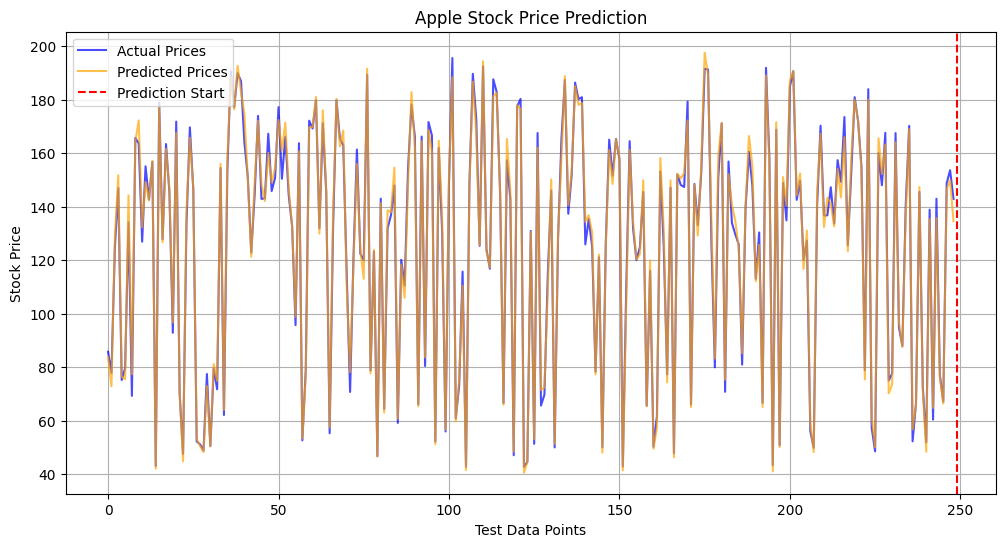

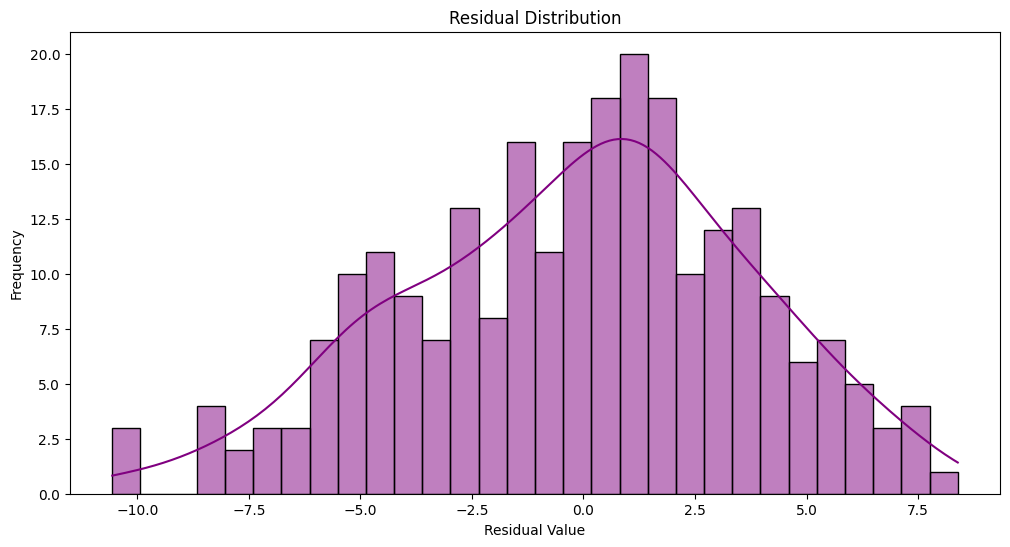

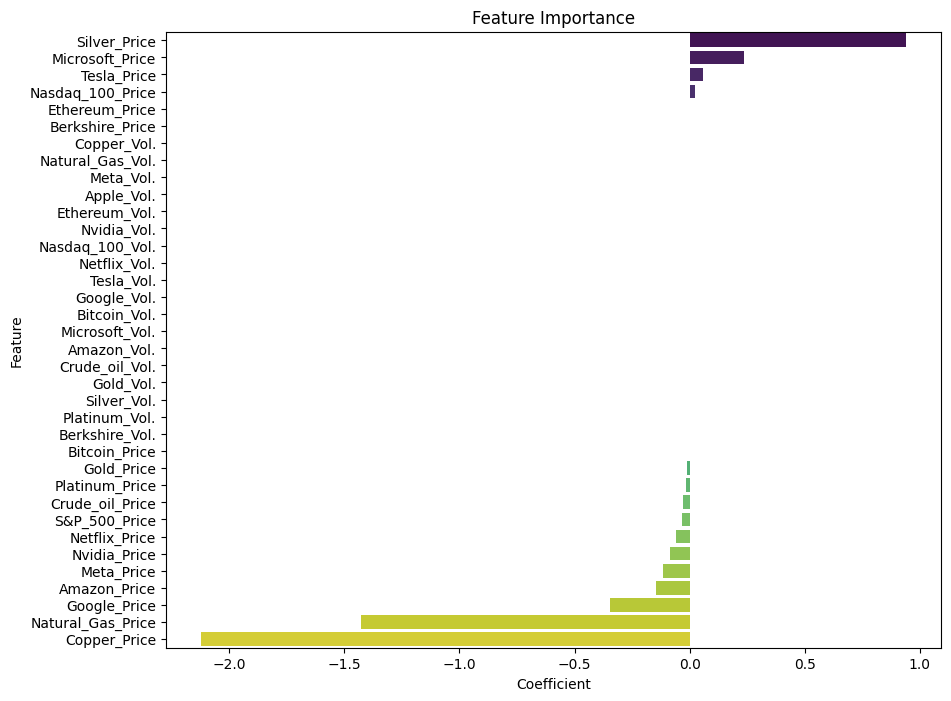

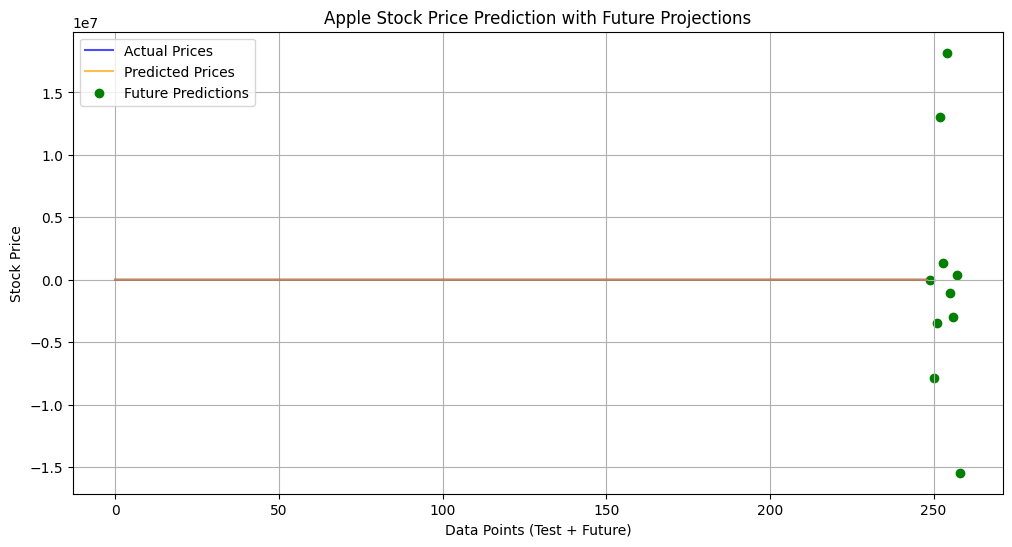

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Stock_Market_Dataset_csv.csv'
data = pd.read_csv(file_path)


data['Date'] = pd.to_datetime(data['Date'])


predict_target = 'Apple_Price'
features = data.drop(columns=['Date', predict_target])
target = data[predict_target]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Prices', color='blue', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Prices', color='orange', alpha=0.7)
plt.title("Apple Stock Price Prediction")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)


plt.axvline(x=len(y_test), color='red', linestyle='--', label='Prediction Start')
plt.legend()
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()


coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis', hue='Feature', dodge=False, legend=False)
plt.title("Feature Importance")
plt.show()


future_steps = 10
last_known_features = pd.DataFrame([X_test.iloc[-1].values], columns=features.columns)
future_predictions = []

for step in range(future_steps):
    next_prediction = model.predict(last_known_features)[0]
    future_predictions.append(next_prediction)
    # Shift the features to simulate future data
    new_row = last_known_features.iloc[-1].shift(-1).to_frame().T
    new_row.iloc[0, -1] = next_prediction
    last_known_features = new_row


plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual Prices', color='blue', alpha=0.7)
plt.plot(range(len(y_test)), y_pred, label='Predicted Prices', color='orange', alpha=0.7)
plt.scatter(range(len(y_test), len(y_test) + future_steps), future_predictions, color='green', label='Future Predictions')
for i, pred in enumerate(future_predictions):
    plt.arrow(len(y_test) + i, pred - 50, 0, 50, color='green', head_width=0.5, head_length=10)
plt.title("Apple Stock Price Prediction with Future Projections")
plt.xlabel("Data Points (Test + Future)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()
